In [1]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import shap
import functions as feature

X, y = shap.datasets.iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test = X_test.reset_index(drop=True)

X_train_means = X_train.mean().to_frame().T

COLUMNS = X_train.columns

nn = MLPClassifier(solver="adam", alpha=1e-1, hidden_layer_sizes=(10, 10, 10, 10), random_state=0, max_iter=1000)
nn.fit(X_train, y_train)

def print_accuracy(f):
    print(
        "Accuracy = {0}%".format(
            100 *
            np.mean(
                f(X_test) == y_test))
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

print_accuracy(nn.predict)

Accuracy = 100.0%


In [2]:
INDEX = 5
y_test[INDEX]

2

  0%|          | 0/1 [00:00<?, ?it/s]

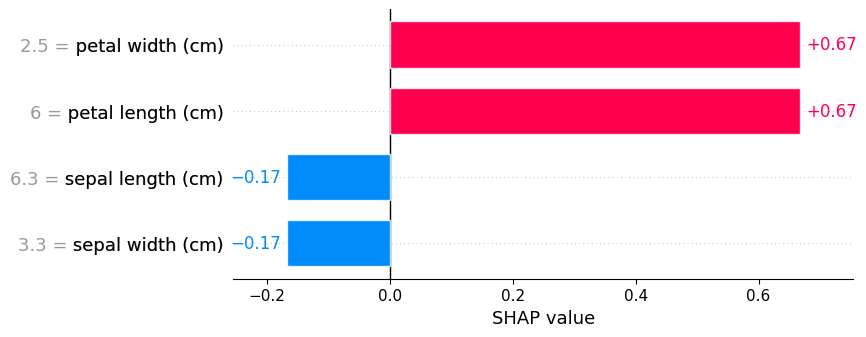

In [3]:
# select only first entry of X_test
item = X_test.iloc[[INDEX]]
shap_values = feature.calc_shap_values(item, X_train_means, nn, COLUMNS)
shap.plots.bar(shap_values[0])

  0%|          | 0/1 [00:00<?, ?it/s]

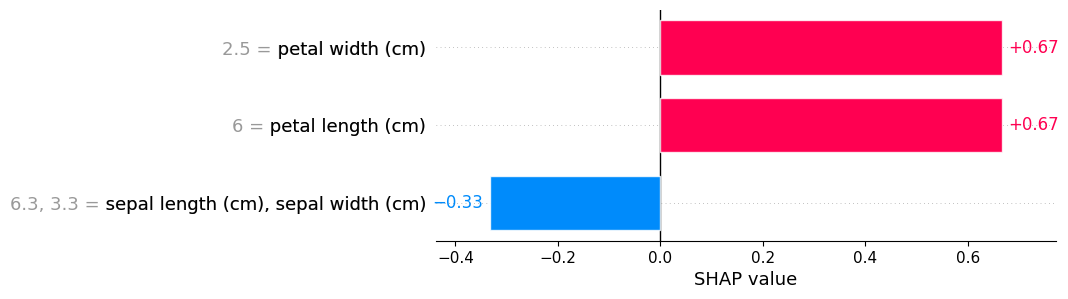

In [4]:
#entangle the named columns
#COL_LIST = [['sepal length (cm)', 'sepal width (cm)'], ['petal length (cm)', 'petal width (cm)']]
COL_LIST = [['sepal length (cm)', 'sepal width (cm)']]
#COL_LIST = [['petal length (cm)', 'petal width (cm)']]

tmp_X_test = feature.combine_columns(X_test.copy(), COL_LIST)
tmp_X_train_means = feature.combine_columns(X_train_means.copy(), COL_LIST)

item = tmp_X_test.iloc[[INDEX]]
shap_values = feature.calc_shap_values(item, tmp_X_train_means, nn, COLUMNS)
shap.plots.bar(shap_values[0])

In [5]:
COLUMNS

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [2]:
import pickle

with open('datasets/iris_nn.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(nn, file)
    
with open('datasets/iris_testdata.csv', 'wb') as file:
    # A new file will be created
    X_test.to_csv(file, index=False)